# Model Ensemble analysis

This notebook contains the analysis of the Ensemble of models created in the prior notebook.

 influence of the GTP to GDP hydrolyzation rate on the Microtubule growth rate. 



In [12]:
# load Packages:

using Serialization
using Plots
using StatsPlots
using StatsBase: counts
using Statistics
using DataFrames

using Agents
using DrWatson: @dict
# load Functions: 
include("init.jl")
include("agentstep.jl")
include("agent.jl")
include("analysis_funs.jl")
include("modelstep.jl")


model_step! (generic function with 1 method)

In [8]:
# Load the data
data_ens=deserialize("data/Ensemblef.jls");

In [9]:
# Add the growthrate
data=data_ens[2]
growth_rate!(data)


In [10]:
data[1:10,:]

10×7 DataFrame
 Row │ step   mean_MT_size  sd_MT_size  p_hyd    p_depolym_GDP  ensemble  grow ⋯
     │ Int64  Float64       Float64     Float64  Float64        Int64     Floa ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     0           1.0    0.0         0.015            0.3         1       ⋯
   2 │     1           1.0    0.0         0.015            0.3         1
   3 │     2           1.0    0.0         0.015            0.3         1
   4 │     3           1.0    0.0         0.015            0.3         1
   5 │     4           1.0    0.0         0.015            0.3         1       ⋯
   6 │     5           1.2    0.447214    0.015            0.3         1
   7 │     6           1.4    0.547723    0.015            0.3         1
   8 │     7           1.4    0.547723    0.015            0.3         1
   9 │     8           1.6    0.547723    0.015            0.3         1       ⋯
  10 │     9           1.6    0.547723    0.015            0.3         1
                                                                1 column omitted

In [53]:
# Create a summary by calculating mean and standart dev of all MT Size and 
# GrowthRate of all 15 models for each p_hyd 

gdf = groupby(data, [:p_depolym_GDP,:p_hyd,:step])

# get some summary Statistics by group
summary_df =combine(gdf, [:mean_MT_size, :growthrate] .=>[mean std])

summary_df[1:15,:]

60005×7 DataFrame
   Row │ p_depolym_GDP  p_hyd    step   mean_MT_size_mean  growthrate_mean  me ⋯
       │ Float64        Float64  Int64  Float64            Float64          Fl ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │           0.3    0.015      0            1.0           0.0            ⋯
     2 │           0.3    0.015      1            1.16          0.16
     3 │           0.3    0.015      2            1.32          0.16
     4 │           0.3    0.015      3            1.47333       0.153333
     5 │           0.3    0.015      4            1.60667       0.133333       ⋯
     6 │           0.3    0.015      5            1.74          0.133333
     7 │           0.3    0.015      6            1.80667       0.0666667
     8 │           0.3    0.015      7            1.86          0.0533333
     9 │           0.3    0.015      8            1.94          0.08           ⋯
    10 │           0.3    0.015      9            2.04667       0.106667
    11 │           0.3    0.015     10            2.16667       0.12
   ⋮   │       ⋮           ⋮       ⋮            ⋮                 ⋮            ⋱
 59996 │           0.3    0.035  11991           32.2533        0.0533333
 59997 │           0.3    0.035  11992           32.3           0.0466667      ⋯
 59998 │           0.3    0.035  11993           32.3133        0.0133333
 59999 │           0.3    0.035  11994           32.32          0.00666667
 60000 │           0.3    0.035  11995           32.3133       -0.00666667
 60001 │           0.3    0.035  11996           32.26         -0.0533333      ⋯
 60002 │           0.3    0.035  11997           32.2667        0.00666667
 60003 │           0.3    0.035  11998           32.3133        0.0466667
 60004 │           0.3    0.035  11999           32.3          -0.0133333
 60005 │           0.3    0.035  12000           32.2933       -0.00666667     ⋯
                                                2 columns and 59984 rows omitted

## Plots

### Plot 1 : Overall mean and standart dev. of Microtubule Size

Timestep and GTP hydrolyzation rate

In [86]:
p1=Plots.plot(xlims=(0,12000),xlabel="Time",ylabel="mean MT Size",
    ylims =(1,110),
    legend= :none,
    legendtitle= "GTP hydrolyzation \n rate",
    legendtitlefontsize=7,
    legendfontsize= 6,
    summary_df.step,
    group = summary_df.p_hyd,
    summary_df.mean_MT_size_mean,
    ribbon= summary_df.mean_MT_size_std)

### Plot 2 : Overall mean and standart dev. of Microtubule Size

Log- Timestep and GTP hydrolyzation rate

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95


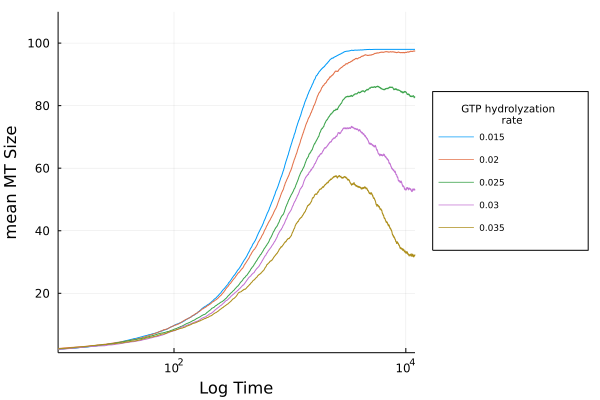

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95


In [84]:
p2=Plots.plot(xlims=(10,12000),xlabel="Log Time",ylabel="mean MT Size",
     xaxis=:log,
    ylims =(1,110),
    legend= :outerright,
    legendtitle= "GTP hydrolyzation \n rate",
    legendtitlefontsize=7,
    legendfontsize= 6,
    summary_df.step,
    group = summary_df.p_hyd,
    summary_df.mean_MT_size_mean)

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95


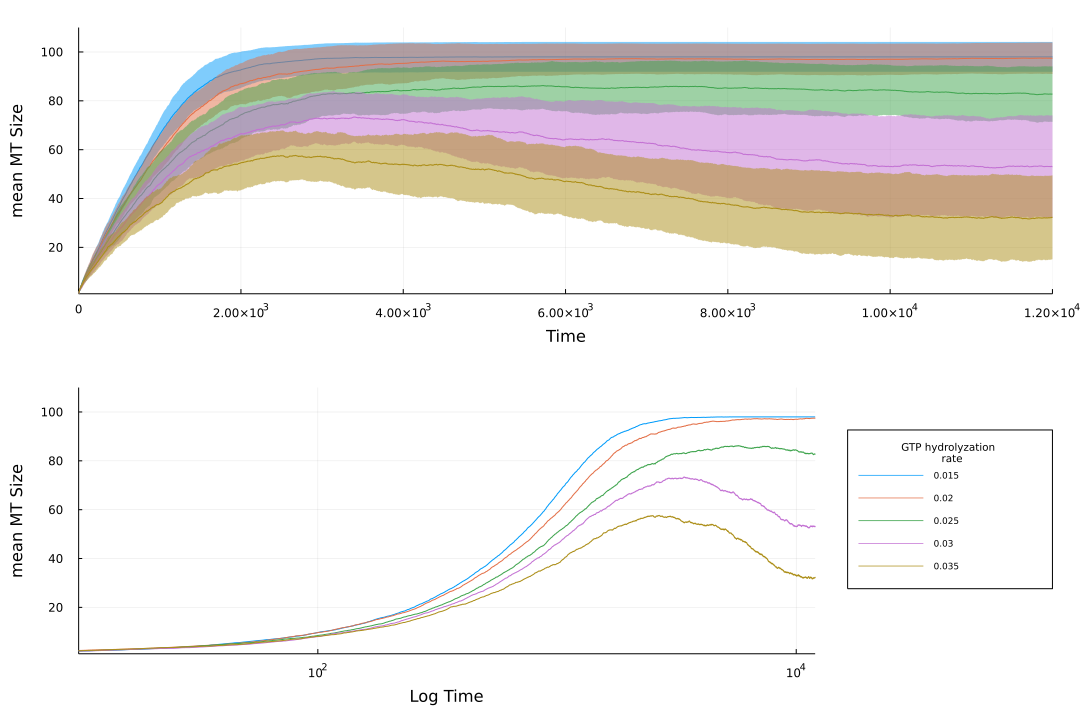

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95


In [99]:
p3=Plots.plot(layout=(2,1), p1,p2, fmt =:png , size = (1080, 720),  margin=5Plots.mm)


## Plot 3: Growth rate 

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95


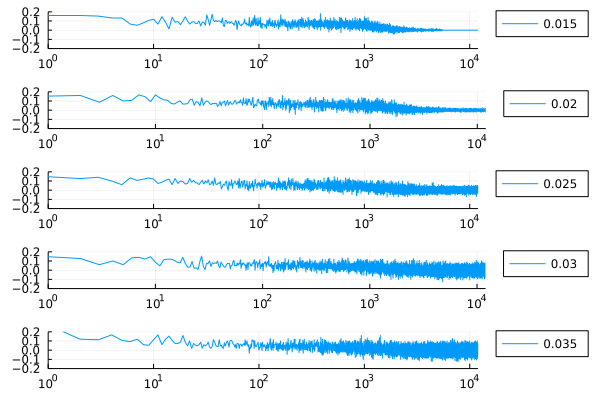

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based xscale
└ @ Plots /home/valentin/.julia/packages/Plots/vFFCj/src/utils.jl:95


In [79]:
Plots.plot( layout=(5,1),
    xlims=(1,12000),
    xaxis=:log,
    ylims =(-0.2,0.2),
    summary_df.step,
    group = summary_df.p_hyd,
    legend= :outerright,
    ls= :auto,
    summary_df.growthrate_mean)



#[:auto, :solid, :dash, :dot, :dashdot, :dashdotdot]

In [100]:
@gif for i ∈ 1000:10000
    Plots.bar(summary_df[summary_df.step .== i,:].growthrate_mean,
    xlabel= "GTP hyd-rate", ylabel= "mean MT - growthrate", ylims= (-0.5,0.5),title="Timestep $i",legend=:none )
end

LoadError: InterruptException:

In [78]:
@gif for i ∈ 1:120
    Plots.boxplot(summary_df[summary_df.step .== i,:].growthrate_mean,
    xlabel= "GTP hyd-rate", ylabel= "MT - growthrate", ylims= (-1,1),title="Timestep $i")
end

LoadError: BoundsError: attempt to access 5-element Base.OneTo{Int64} at index [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  11992, 11993, 11994, 11995, 11996, 11997, 11998, 11999, 12000, 12001]]